#### 6.1.1

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

##　Following writing way is avairable
'''
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' 
                  'breast-cancer-wisconsin/wdbc.data',header=None)
'''

"\ndf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' \n                  'breast-cancer-wisconsin/wdbc.data',header=None)\n"

In [2]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

In [3]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [4]:
le.classes_

array(['B', 'M'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, \
                                                   stratify=y, random_state=1)

#### 6.2.2 stratified k-fold cross-validation

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), \
                       PCA(n_components=2), \
                       LogisticRegression(random_state=1)
                       )
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)

In [7]:
import numpy as np

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train,y_train)
scores = []

for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % \
           (k+1, np.bincount(y_train[train]), score))

    print('\nCV accuracy] %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    

Fold:  1, Class dist.: [256 153], Acc: 0.935

CV accuracy] 0.935 +/- 0.000
Fold:  2, Class dist.: [256 153], Acc: 0.935

CV accuracy] 0.935 +/- 0.000
Fold:  3, Class dist.: [256 153], Acc: 0.957

CV accuracy] 0.942 +/- 0.010
Fold:  4, Class dist.: [256 153], Acc: 0.957

CV accuracy] 0.946 +/- 0.011
Fold:  5, Class dist.: [256 153], Acc: 0.935

CV accuracy] 0.943 +/- 0.011
Fold:  6, Class dist.: [257 153], Acc: 0.956

CV accuracy] 0.945 +/- 0.011
Fold:  7, Class dist.: [257 153], Acc: 0.978

CV accuracy] 0.950 +/- 0.015
Fold:  8, Class dist.: [257 153], Acc: 0.933

CV accuracy] 0.948 +/- 0.015
Fold:  9, Class dist.: [257 153], Acc: 0.956

CV accuracy] 0.949 +/- 0.014
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy] 0.950 +/- 0.014


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train, y=y_train,
                         cv=10, n_jobs=1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)) )

CV accuracy scores: [1.         0.97826087 1.         0.97826087 0.93478261 0.95555556
 0.97777778 0.97777778 1.         1.        ]
CV accuracy: 0.980 +/- 0.021


### 6.3.1 Variance and Bias

C:\Users\yueki\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


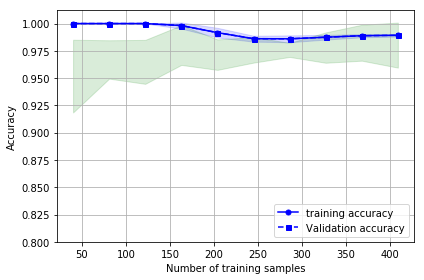

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), \
                      LogisticRegression(penalty='l2', random_state=1) )

train_sizes, train_scores,test_scores = learning_curve(estimator=pipe_lr, \
                                                     X=X_train, \
                                                     y=y_train, \
                                                     train_sizes=np.linspace(0.1,1.0,10), \
                                                     cv=10, \
                                                     n_jobs=1)



train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
%matplotlib inline
plt.plot(train_sizes,train_mean, \
         color='blue',marker='o', \
         markersize=5, \
         label='training accuracy')

plt.fill_between(train_sizes, \
                 train_mean + train_std, \
                 train_mean - train_std, \
                 alpha=0.15, color='blue')

plt.plot(train_sizes, train_mean, \
         color='blue', \
         linestyle='--' , \
         marker='s', \
         markersize=5, \
         label='Validation accuracy'
        )

plt.fill_between(train_sizes, \
         test_mean + test_std, \
         test_mean - test_std, \
         alpha=0.15, color='green'
         )

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0125])
plt.tight_layout()
plt.show()

### 6.3.2 Validation Curve

In [9]:
from sklearn.model_selection import validation_curve
param_range= [0.001, 0.01,0.1,1.,10.,100.]

train_scores, test_scores = validation_curve(estimator=pipe_lr, \
                                                     X=X_train, \
                                                     y=y_train, \
                                                     param_name='logisticregression__C',
                                                     param_range=param_range, \
                                                     cv=10, \
                                                     n_jobs=1)




In [10]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)


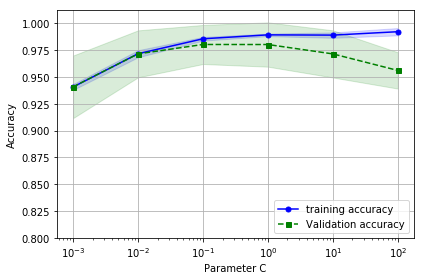

In [11]:

%matplotlib inline
plt.plot(param_range,train_mean, \
         color='blue',marker='o', \
         markersize=5, \
         label='training accuracy')

plt.fill_between(param_range, \
                 train_mean + train_std, \
                 train_mean - train_std, \
                 alpha=0.15, color='blue'
                )

plt.plot(param_range, test_mean, \
         color='green', \
         linestyle='--' , \
         marker='s', \
         markersize=5, \
         label='Validation accuracy'
        )

plt.fill_between(param_range, \
         test_mean + test_std, \
         test_mean - test_std, \
         alpha=0.15, color='green'
         )

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.0125])
plt.tight_layout()
plt.show()

## 6.4. Model Tuning by Grid Search

#### 6.4.1

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range =  [0.0001,0.001, 0.01,0.1,1.,10.,100.,1000.]
param_grid = [{'svc__C' : param_range, 'svc__kernel': ['linear']},
              {'svc__C' : param_range, 'svc__gamma': param_range,
              'svc__kernel': ['rbf']}]



gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)



print(gs.best_score_)

#  Parameter @ Best score
print(gs.best_params_)

In [36]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test,y_test))


Test accuracy: 0.974


#### 6.4.2 nested Cross-Validation

In [40]:
from sklearn.model_selection import cross_val_score

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.974 +/- 0.015


### 6.5 Looking at different performance evaluation metrics


#### 6.5.1 confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


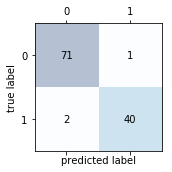

In [51]:
fig, ax = plt.subplots(figsize=(2.5,2.5))

ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i, s=confmat[i,j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

#### 6.5.2 Optimizing the precision and recall of a classification model

In [53]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


In [54]:
# Custom scorer
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1
                 )
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9880219137963148
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


#### 6.5.3 ROC curve

In [58]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(penalty='l2', random_state=1,C=100.0))

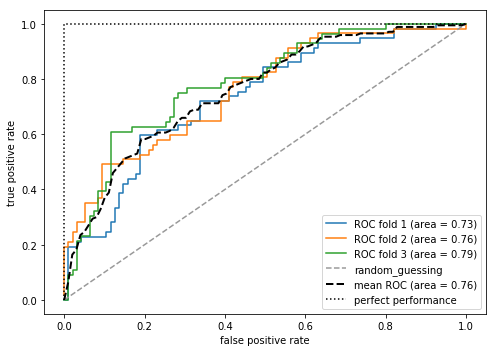

In [80]:
X_train2 = X_train[:, [4,14]]
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train,y_train))
fig = plt.figure(figsize=(7,5))

mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],probas[:,1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

    
# Plot ate predict
plt.plot([0,1],
         [0,1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random_guessing'
        )


mean_tpr  /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

[(array([143, 145, 147, 148, 150, 152, 153, 154, 155, 156, 158, 159, 161,
         163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177,
         178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
         191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
         204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
         217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
         230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
         243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
         256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
         269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
         282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
         295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
         308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
         321, 322, 323, 324, 325, 326,